**IMPORTS**

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**READ DATA**

In [2]:
df = pd.read_csv('Case Study Data.csv')

In [3]:
df

,COLLECTOR_NUMBER,ACCOUNT_STATUS,COLLECTOR_TIER,GHOST_FLAG,ENROLLMENT_DATE,TENURE_MONTHS,ACCOUNT_CREATION_DATE,ACTIVATION_STATUS,BIRTHDATE,AGE,...,AMC_EVER_OPTED_IN_FLAG,TEST_ACCOUNT_FLAG,HOME_CMA_ID,earned_campaign_period,Post1M_earn,web_active_30days,email_active_30days,Control_Flag,Responded,Unnamed: 39
0,80003744040,A,G,N,4/12/1995,291,4/12/1995,A,4/5/1964,55.0,...,N,N,48835,937,593,True,True,N,N,NaN
1,80005319578,A,O,N,4/11/1997,267,4/11/1997,A,6/10/1973,46.0,...,Y,N,13320,3788,1353,True,True,Y,N,NaN
2,80009925670,A,B,N,11/18/2000,224,11/18/2000,A,12/22/1973,45.0,...,Y,N,48835,314,83,True,True,N,N,NaN
3,80063574566,A,B,N,7/7/1994,301,5/26/1995,A,7/28/1969,49.0,...,N,N,35535,23,2,False,True,N,N,NaN
4,80068166807,A,B,N,7/23/1998,252,7/23/1998,A,10/25/1977,41.0,...,Y,N,48835,12,130,True,False,N,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8593,84017432591,A,B,N,2/16/2004,185,2/16/2004,A,3/22/1983,36.0,...,N,N,24462,17,2,False,True,N,N,NaN
8594,84020230488,A,B,N,3/19/2004,184,3/19/2004,A,11/4/1985,33.0,...,N,N,35590,43,10,False,False,N,N,NaN
8595,84034458874,A,O,N,6/22/2006,157,6/22/2006,A,1/24/1971,48.0,...,N,N,35535,2611,475,True,True,N,N,NaN
8596,84096372260,A,B,N,8/27/2013,71,8/28/2013,A,10/25/1975,43.0,...,Y,N,35535,10,4,False,True,N,N,NaN


**Data Exploration & Cleaning**

In [4]:
df =df.drop(['Unnamed: 39'],axis=1)

In [5]:
df.shape

(8598, 39)

In [6]:
df.columns

Index(['COLLECTOR_NUMBER', 'ACCOUNT_STATUS', 'COLLECTOR_TIER', 'GHOST_FLAG',
       'ENROLLMENT_DATE', 'TENURE_MONTHS', 'ACCOUNT_CREATION_DATE',
       'ACTIVATION_STATUS', 'BIRTHDATE', 'AGE', 'GENDER', 'LANGUAGE',
       'HOUSEHOLD_INCOME_CATEGORY', 'HOUSEHOLD_INCOME_SOURCE_CODE',
       'HOME_ADDRESS_CITY', 'HOME_ADDRESS_PROVINCE_CODE',
       'HOME_ADDRESS_POSTAL_CODE', 'EXTENDED_DATA_FLAG', 'PROMO_MAILABLE_FLAG',
       'ADDRESS_UPDATE_DATE', 'REP_ADDRESS_CITY', 'REP_ADDRESS_PROVINCE_CODE',
       'REP_ADDRESS_POSTAL_CODE', 'REP_ADDRESS_REGION_CODE', 'ACCOUNT_BALANCE',
       'DREAM_ACCOUNT_BALANCE', 'CASH_ACCOUNT_BALANCE', 'DORMANT_FLAG',
       'CASH_RATIO', 'LAST_RATIO_CHG_DATE', 'AMC_EVER_OPTED_IN_FLAG',
       'TEST_ACCOUNT_FLAG', 'HOME_CMA_ID', 'earned_campaign_period',
       'Post1M_earn', 'web_active_30days', 'email_active_30days',
       'Control_Flag', 'Responded'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8598 entries, 0 to 8597
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   COLLECTOR_NUMBER              8598 non-null   int64  
 1   ACCOUNT_STATUS                8598 non-null   object 
 2   COLLECTOR_TIER                8598 non-null   object 
 3   GHOST_FLAG                    8598 non-null   object 
 4   ENROLLMENT_DATE               8598 non-null   object 
 5   TENURE_MONTHS                 8598 non-null   int64  
 6   ACCOUNT_CREATION_DATE         8598 non-null   object 
 7   ACTIVATION_STATUS             8598 non-null   object 
 8   BIRTHDATE                     8598 non-null   object 
 9   AGE                           8393 non-null   float64
 10  GENDER                        6723 non-null   object 
 11  LANGUAGE                      8598 non-null   object 
 12  HOUSEHOLD_INCOME_CATEGORY     3409 non-null   float64
 13  HOU

**Check for Duplicates**

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().values.any()

False

In [10]:
df

,COLLECTOR_NUMBER,ACCOUNT_STATUS,COLLECTOR_TIER,GHOST_FLAG,ENROLLMENT_DATE,TENURE_MONTHS,ACCOUNT_CREATION_DATE,ACTIVATION_STATUS,BIRTHDATE,AGE,...,LAST_RATIO_CHG_DATE,AMC_EVER_OPTED_IN_FLAG,TEST_ACCOUNT_FLAG,HOME_CMA_ID,earned_campaign_period,Post1M_earn,web_active_30days,email_active_30days,Control_Flag,Responded
0,80003744040,A,G,N,4/12/1995,291,4/12/1995,A,4/5/1964,55.0,...,NaN,N,N,48835,937,593,True,True,N,N
1,80005319578,A,O,N,4/11/1997,267,4/11/1997,A,6/10/1973,46.0,...,6/2/2014,Y,N,13320,3788,1353,True,True,Y,N
2,80009925670,A,B,N,11/18/2000,224,11/18/2000,A,12/22/1973,45.0,...,5/1/2015,Y,N,48835,314,83,True,True,N,N
3,80063574566,A,B,N,7/7/1994,301,5/26/1995,A,7/28/1969,49.0,...,NaN,N,N,35535,23,2,False,True,N,N
4,80068166807,A,B,N,7/23/1998,252,7/23/1998,A,10/25/1977,41.0,...,3/14/2013,Y,N,48835,12,130,True,False,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8593,84017432591,A,B,N,2/16/2004,185,2/16/2004,A,3/22/1983,36.0,...,NaN,N,N,24462,17,2,False,True,N,N
8594,84020230488,A,B,N,3/19/2004,184,3/19/2004,A,11/4/1985,33.0,...,NaN,N,N,35590,43,10,False,False,N,N
8595,84034458874,A,O,N,6/22/2006,157,6/22/2006,A,1/24/1971,48.0,...,NaN,N,N,35535,2611,475,True,True,N,N
8596,84096372260,A,B,N,8/27/2013,71,8/28/2013,A,10/25/1975,43.0,...,8/28/2013,Y,N,35535,10,4,False,True,N,N


In [11]:
df.shape

(8565, 39)

**Check for NaN Values**

In [12]:
df.isnull().values.any()

True

In [13]:
df.isna().sum()

COLLECTOR_NUMBER                   0
ACCOUNT_STATUS                     0
COLLECTOR_TIER                     0
GHOST_FLAG                         0
ENROLLMENT_DATE                    0
TENURE_MONTHS                      0
ACCOUNT_CREATION_DATE              0
ACTIVATION_STATUS                  0
BIRTHDATE                          0
AGE                              205
GENDER                          1863
LANGUAGE                           0
HOUSEHOLD_INCOME_CATEGORY       5171
HOUSEHOLD_INCOME_SOURCE_CODE    8528
HOME_ADDRESS_CITY                  0
HOME_ADDRESS_PROVINCE_CODE         0
HOME_ADDRESS_POSTAL_CODE           0
EXTENDED_DATA_FLAG                 0
PROMO_MAILABLE_FLAG                0
ADDRESS_UPDATE_DATE               69
REP_ADDRESS_CITY                   0
REP_ADDRESS_PROVINCE_CODE          0
REP_ADDRESS_POSTAL_CODE            0
REP_ADDRESS_REGION_CODE            0
ACCOUNT_BALANCE                    0
DREAM_ACCOUNT_BALANCE              0
CASH_ACCOUNT_BALANCE               0
D

In [14]:
df[df['AGE'].isna()]

,COLLECTOR_NUMBER,ACCOUNT_STATUS,COLLECTOR_TIER,GHOST_FLAG,ENROLLMENT_DATE,TENURE_MONTHS,ACCOUNT_CREATION_DATE,ACTIVATION_STATUS,BIRTHDATE,AGE,...,LAST_RATIO_CHG_DATE,AMC_EVER_OPTED_IN_FLAG,TEST_ACCOUNT_FLAG,HOME_CMA_ID,earned_campaign_period,Post1M_earn,web_active_30days,email_active_30days,Control_Flag,Responded
149,83021935770,A,G,N,10/15/1998,249,10/15/1998,A,0001-01-01,NaN,...,6/3/2017,Y,N,12205,290,118,False,False,N,Y
186,81735442764,A,G,N,1/11/1995,294,1/11/1995,A,0001-01-01,NaN,...,8/16/2014,Y,N,13305,1643,445,False,True,N,N
214,89005047497,A,G,N,4/3/2018,16,4/3/2018,A,0001-01-01,NaN,...,4/10/2018,Y,N,35535,584,72,True,NaN,Y,N
246,83024446239,A,B,N,7/31/1998,252,7/31/1998,A,0001-01-01,NaN,...,NaN,N,N,35535,22,7,True,True,Y,N
286,83024074760,A,G,N,8/7/1998,252,8/7/1998,A,0001-01-01,NaN,...,12/4/2012,Y,N,35532,505,294,True,True,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,80001468553,A,B,N,11/20/1992,320,11/20/1992,A,0001-01-01,NaN,...,NaN,N,N,48835,34,30,False,True,N,N
8391,83050456985,A,B,N,11/10/2001,212,12/12/2001,A,0001-01-01,NaN,...,11/13/2012,Y,N,12220,150,123,False,True,N,N
8398,83459215144,A,B,N,1/1/2016,43,1/1/2016,A,0001-01-01,NaN,...,NaN,N,N,59933,396,69,False,NaN,N,N
8405,84074407512,A,B,N,4/2/2009,124,4/2/2009,A,0001-01-01,NaN,...,3/27/2018,Y,N,24462,168,12,False,NaN,N,N


In [15]:
df.dropna(subset= ['AGE'],inplace= True) 

**ANALYSIS**

In [16]:
df

,COLLECTOR_NUMBER,ACCOUNT_STATUS,COLLECTOR_TIER,GHOST_FLAG,ENROLLMENT_DATE,TENURE_MONTHS,ACCOUNT_CREATION_DATE,ACTIVATION_STATUS,BIRTHDATE,AGE,...,LAST_RATIO_CHG_DATE,AMC_EVER_OPTED_IN_FLAG,TEST_ACCOUNT_FLAG,HOME_CMA_ID,earned_campaign_period,Post1M_earn,web_active_30days,email_active_30days,Control_Flag,Responded
0,80003744040,A,G,N,4/12/1995,291,4/12/1995,A,4/5/1964,55.0,...,NaN,N,N,48835,937,593,True,True,N,N
1,80005319578,A,O,N,4/11/1997,267,4/11/1997,A,6/10/1973,46.0,...,6/2/2014,Y,N,13320,3788,1353,True,True,Y,N
2,80009925670,A,B,N,11/18/2000,224,11/18/2000,A,12/22/1973,45.0,...,5/1/2015,Y,N,48835,314,83,True,True,N,N
3,80063574566,A,B,N,7/7/1994,301,5/26/1995,A,7/28/1969,49.0,...,NaN,N,N,35535,23,2,False,True,N,N
4,80068166807,A,B,N,7/23/1998,252,7/23/1998,A,10/25/1977,41.0,...,3/14/2013,Y,N,48835,12,130,True,False,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8593,84017432591,A,B,N,2/16/2004,185,2/16/2004,A,3/22/1983,36.0,...,NaN,N,N,24462,17,2,False,True,N,N
8594,84020230488,A,B,N,3/19/2004,184,3/19/2004,A,11/4/1985,33.0,...,NaN,N,N,35590,43,10,False,False,N,N
8595,84034458874,A,O,N,6/22/2006,157,6/22/2006,A,1/24/1971,48.0,...,NaN,N,N,35535,2611,475,True,True,N,N
8596,84096372260,A,B,N,8/27/2013,71,8/28/2013,A,10/25/1975,43.0,...,8/28/2013,Y,N,35535,10,4,False,True,N,N


In [17]:
df['Responded_Yes']=pd.get_dummies(df['Responded'],drop_first=True)

In [18]:
df

,COLLECTOR_NUMBER,ACCOUNT_STATUS,COLLECTOR_TIER,GHOST_FLAG,ENROLLMENT_DATE,TENURE_MONTHS,ACCOUNT_CREATION_DATE,ACTIVATION_STATUS,BIRTHDATE,AGE,...,AMC_EVER_OPTED_IN_FLAG,TEST_ACCOUNT_FLAG,HOME_CMA_ID,earned_campaign_period,Post1M_earn,web_active_30days,email_active_30days,Control_Flag,Responded,Responded_Yes
0,80003744040,A,G,N,4/12/1995,291,4/12/1995,A,4/5/1964,55.0,...,N,N,48835,937,593,True,True,N,N,0
1,80005319578,A,O,N,4/11/1997,267,4/11/1997,A,6/10/1973,46.0,...,Y,N,13320,3788,1353,True,True,Y,N,0
2,80009925670,A,B,N,11/18/2000,224,11/18/2000,A,12/22/1973,45.0,...,Y,N,48835,314,83,True,True,N,N,0
3,80063574566,A,B,N,7/7/1994,301,5/26/1995,A,7/28/1969,49.0,...,N,N,35535,23,2,False,True,N,N,0
4,80068166807,A,B,N,7/23/1998,252,7/23/1998,A,10/25/1977,41.0,...,Y,N,48835,12,130,True,False,N,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8593,84017432591,A,B,N,2/16/2004,185,2/16/2004,A,3/22/1983,36.0,...,N,N,24462,17,2,False,True,N,N,0
8594,84020230488,A,B,N,3/19/2004,184,3/19/2004,A,11/4/1985,33.0,...,N,N,35590,43,10,False,False,N,N,0
8595,84034458874,A,O,N,6/22/2006,157,6/22/2006,A,1/24/1971,48.0,...,N,N,35535,2611,475,True,True,N,N,0
8596,84096372260,A,B,N,8/27/2013,71,8/28/2013,A,10/25/1975,43.0,...,Y,N,35535,10,4,False,True,N,N,0


In [19]:
df.corr()

,COLLECTOR_NUMBER,TENURE_MONTHS,AGE,HOUSEHOLD_INCOME_CATEGORY,ACCOUNT_BALANCE,DREAM_ACCOUNT_BALANCE,CASH_ACCOUNT_BALANCE,CASH_RATIO,earned_campaign_period,Post1M_earn,Responded_Yes
COLLECTOR_NUMBER,1.000000,-0.238094,-0.169327,-0.022635,-0.066628,-0.063750,-0.025731,0.024242,-0.052883,-0.054569,0.014374
TENURE_MONTHS,-0.238094,1.000000,0.590602,0.137897,0.204161,0.200906,0.042003,-0.138975,0.153923,0.141100,-0.013741
AGE,-0.169327,0.590602,1.000000,0.116967,0.144793,0.139218,0.051427,-0.041097,0.115973,0.106042,-0.012643
HOUSEHOLD_INCOME_CATEGORY,-0.022635,0.137897,0.116967,1.000000,0.162962,0.164744,0.005340,-0.156843,0.170948,0.194637,-0.016755
ACCOUNT_BALANCE,-0.066628,0.204161,0.144793,0.162962,1.000000,0.988888,0.173728,-0.280555,0.450149,0.513494,-0.014071
DREAM_ACCOUNT_BALANCE,-0.063750,0.200906,0.139218,0.164744,0.988888,1.000000,0.025396,-0.319807,0.443743,0.495113,-0.014516
CASH_ACCOUNT_BALANCE,-0.025731,0.042003,0.051427,0.005340,0.173728,0.025396,1.000000,0.231935,0.087503,0.173169,0.001536
CASH_RATIO,0.024242,-0.138975,-0.041097,-0.156843,-0.280555,-0.319807,0.231935,1.000000,-0.187759,-0.166619,0.007919
earned_campaign_period,-0.052883,0.153923,0.115973,0.170948,0.450149,0.443743,0.087503,-0.187759,1.000000,0.607448,-0.015642
Post1M_earn,-0.054569,0.141100,0.106042,0.194637,0.513494,0.495113,0.173169,-0.166619,0.607448,1.000000,-0.007680


<AxesSubplot:>

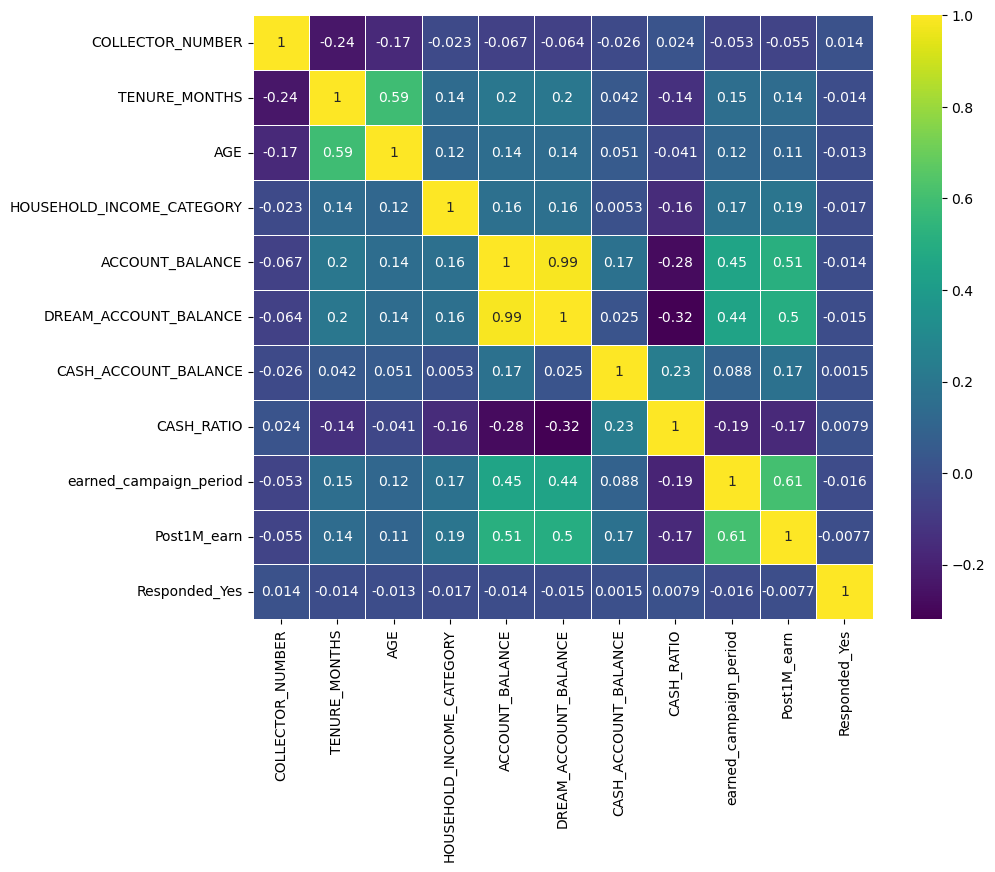

In [21]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df.corr(),linewidth=0.5,cmap ='viridis',annot=True)

In [22]:
df['Responded'].value_counts()

N    8103
Y     257
Name: Responded, dtype: int64

In [23]:
df.groupby(['COLLECTOR_TIER','Responded'])['Responded_Yes'].count()

COLLECTOR_TIER  Responded
B               N            4243
                Y             137
G               N            2714
                Y              93
O               N            1146
                Y              27
Name: Responded_Yes, dtype: int64

In [24]:
tier_respond_breakdown = df.groupby(['COLLECTOR_TIER','Responded'])['Responded_Yes'].count().reset_index()
tier_respond_breakdown

,COLLECTOR_TIER,Responded,Responded_Yes
0,B,N,4243
1,B,Y,137
2,G,N,2714
3,G,Y,93
4,O,N,1146
5,O,Y,27


<AxesSubplot:xlabel='COLLECTOR_TIER', ylabel='Responded_Yes'>

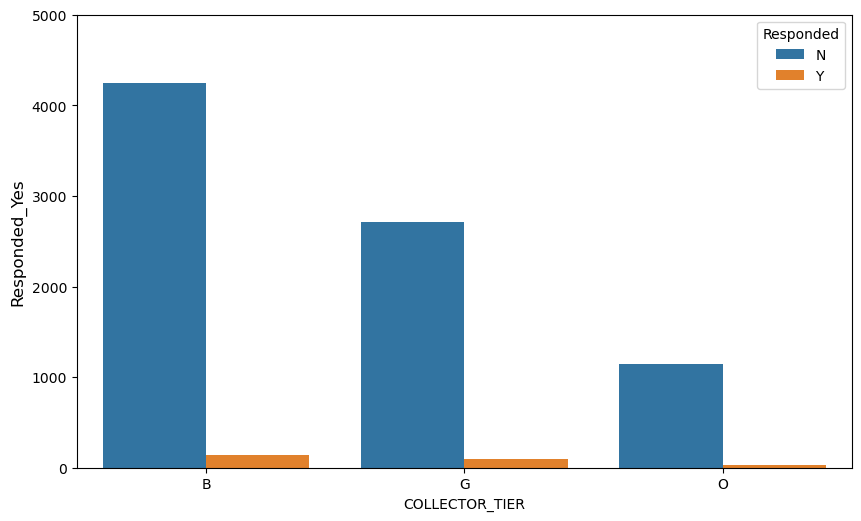

In [25]:
plt.figure(figsize=(10,6),dpi=100)
plt.xticks(fontsize = '10')
plt.yticks(fontsize = '10')
plt.ylabel('Responded',fontsize = '12')
plt.ylim(0,5000)
sns.barplot(data=tier_respond_breakdown,x='COLLECTOR_TIER', y='Responded_Yes', hue='Responded')

In [26]:
tier_respond_pivot = pd.pivot_table(data=tier_respond_breakdown,index = 'COLLECTOR_TIER',columns='Responded', values= 'Responded_Yes').reset_index()
tier_respond_pivot

Responded,COLLECTOR_TIER,N,Y
0,B,4243,137
1,G,2714,93
2,O,1146,27


In [27]:
tier_respond_pivot['Responded_Count'] = tier_respond_pivot['N']+tier_respond_pivot['Y']
tier_respond_pivot['N_percentage'] = round((tier_respond_pivot['N'] / tier_respond_pivot['Responded_Count'] )*100,2)
tier_respond_pivot['Y_percentage'] = round((tier_respond_pivot['Y'] / tier_respond_pivot['Responded_Count'] )*100,2)
tier_respond_pivot[['COLLECTOR_TIER','Responded_Count', 'Y','N','Y_percentage','N_percentage']]
tier_respond_pivot

Responded,COLLECTOR_TIER,N,Y,Responded_Count,N_percentage,Y_percentage
0,B,4243,137,4380,96.87,3.13
1,G,2714,93,2807,96.69,3.31
2,O,1146,27,1173,97.70,2.30
